Bayangkan Anda adalah seorang peneliti medis yang mengumpulkan data untuk penelitian. Anda telah mengumpulkan data tentang sekumpulan pasien, yang semuanya menderita penyakit yang sama. Selama pengobatan mereka, setiap pasien menanggapi salah satu dari 5 obat, Obat A, Obat B, Obat c, Obat x dan y.

Bagian dari tugas Anda adalah membuat model untuk mengetahui obat mana yang mungkin cocok untuk pasien di masa mendatang dengan penyakit yang sama. Fitur dari dataset ini adalah Usia, Jenis Kelamin, Tekanan Darah, dan Kolesterol pasien, dan targetnya adalah obat yang ditanggapi oleh setiap pasien.

Ini adalah sampel pengklasifikasi multikelas, dan Anda dapat menggunakan bagian pelatihan dari kumpulan data untuk membuat pohon keputusan, lalu menggunakannya untuk memprediksi kelas pasien yang tidak dikenal, atau untuk meresepkan obat kepada pasien baru.

Sumber DATA: IBM


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

**Import Dataset**



```
tahap pertama data collection
```



In [32]:
dataset = pd.read_csv('drug200 (2).csv')

print('Sample Data')
dataset.head()

Sample Data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


ini data preperation


In [33]:
dataset = pd.read_csv('drug200 edit.csv')

print('Sample Data')
dataset.head()

Sample Data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4


Cek missing value dan tipe data

In [34]:
dataset.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [35]:
dataset.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

Menentukan label dan atribut serta split data

mensplit data training dan testing 30% data testing dan 70% data training

In [36]:
x = dataset.iloc[: , :5]
y = dataset['Drug']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state=0)

**Decision Tree (classification)**

melatih model

ini training model

In [37]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

tahap evaluasi

nilai akurasi

In [38]:
print('Decisoin Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decisoin Tree Accuracy: 1.000


visualisasi model

[Text(0.6666666666666666, 0.9, 'x[4] <= 14.829\ngini = 0.712\nsamples = 140\nvalue = [18, 13, 12, 36, 61]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 1.5\ngini = 0.69\nsamples = 79\nvalue = [18, 13, 12, 36, 0]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 48\nvalue = [0, 0, 12, 36, 0]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 1.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 12, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\ngini = 0.487\nsamples = 31\nvalue = [18, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsamples

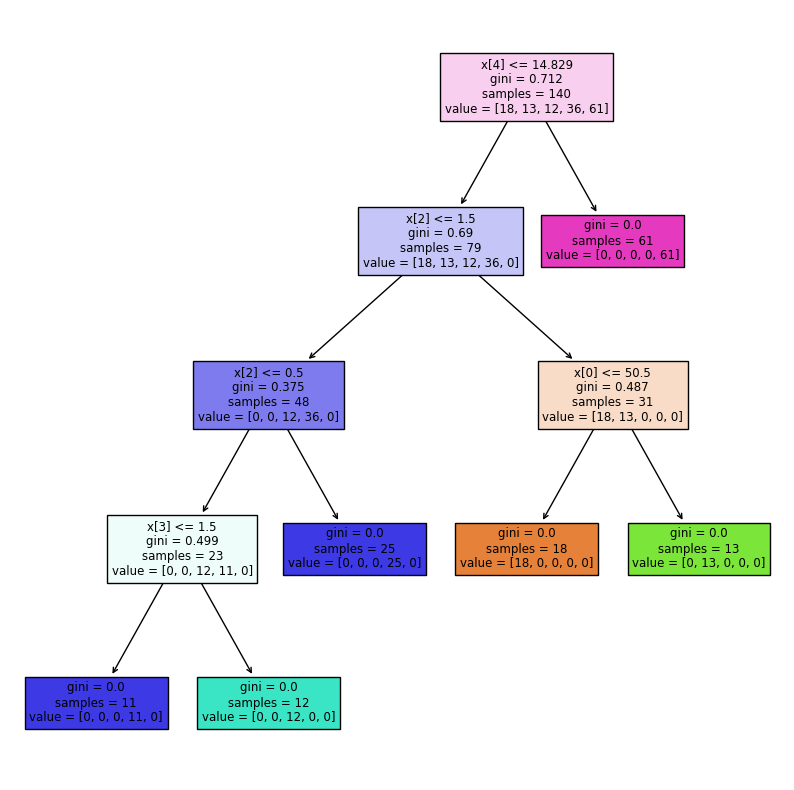

In [39]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, filled=True)